# An example of data mining course

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. <br/> Anaconda provides a simple double-click installer for your convenience.


The main libraries that the notebook will use are:

* [**numpy**](http://www.numpy.org/): Provides a fast numerical array structure and helper functions
* [**pandas**](http://pandas.pydata.org/): Provides a DataFrame structure to store data in memory and work with it easily and efficiently
* [**scikit-learn**](http://scikit-learn.org/stable/): The essential Machine Learning package in Python
* [**matplotlib**](http://matplotlib.org/): Basic plotting library in Python; most other Python plotting libraries are built on top of it

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

*You can [Customize plots with style sheets](http://matplotlib.org/users/style_sheets.html) if needed.*

In [2]:
# Customizing plots with style 
from pylab import rcParams

rcParams['figure.figsize'] = 10, 5
rcParams['lines.linewidth'] = 2
plt.style.use('ggplot')

# 0. Warm up

In [3]:
a = [1, 3, 5, 7, 9]
b = [2, 4, 6, 8, 10]

na = np.array(a)
nb = np.array(b)

# print (a*b) # -> will get error that "TypeError: can't multiply sequence by non-int of type 'list'"
print ('na*nb: ', na*nb)
print ('na@nb: ', na@nb)#若是1-dimension -> 內積
print ('mean: ', np.mean(a))
print ('std: ', np.std(a))

# You can use np.[TAB] to get more functions

na*nb:  [ 2 12 30 56 90]
na@nb:  190
mean:  5.0
std:  2.82842712475


In [4]:
na = np.array([[1, 2, 3], [4, 5, 6]])
nb = np.array([[7, 8, 9], [10, 11, 12]])

print('na: \n', na)
print('na.T: \n', na.T)
print('na*nb: \n', na * nb)
print('na@nb.T: \n', na @ nb.T)#矩陣乘法
print('na@nb.T: \n', na @ nb.T)

na: 
 [[1 2 3]
 [4 5 6]]
na.T: 
 [[1 4]
 [2 5]
 [3 6]]
na*nb: 
 [[ 7 16 27]
 [40 55 72]]
na@nb.T: 
 [[ 50  68]
 [122 167]]
na@nb.T: 
 [[ 50  68]
 [122 167]]


In [5]:
df = pd.DataFrame([['Paul', 'M', 18], ['Jean', 'F', 33], ['Tom', 'M', 35], ['Tony', 'M', 33], ['Amy', 'F', 21], ['Lisa', 'F', 20]])
df.columns=['Name', 'Gender', 'Age']
df

,Name,Gender,Age
0,Paul,M,18
1,Jean,F,33
2,Tom,M,35
3,Tony,M,33
4,Amy,F,21
5,Lisa,F,20


x1 [ 0.25027718  0.40823458  0.02570595  0.63289775  0.39986045  0.9165342
  0.67327269  0.33135621  0.95021181  0.31951576]
x2 [ 0.01447515  0.27128463  0.74502708  0.37638315  0.5364511   0.79291826
  0.32323458  0.32490374  0.64189534  0.91655391]


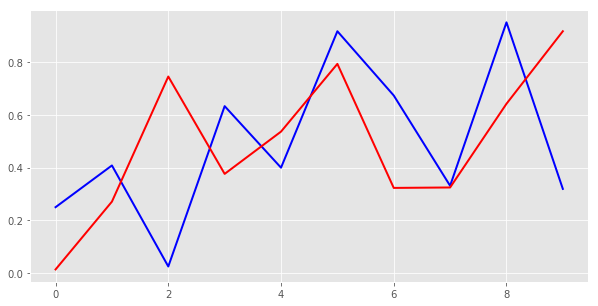

In [6]:
x1 = np.random.uniform(0,1,size=10)
x2 = np.random.uniform(0,1,size=10)
print ('x1', x1)
print ('x2', x2)

plt.plot(x1, c='b')# x1, color是藍色
plt.plot(x2, c='r')#x2, color 是紅色
plt.show()

# 1. PM2.5

- Link: [LASS臉書社群](https://www.facebook.com/groups/1607718702812067/) / [LASS Hackpad共筆](https://lass.hackpad.com/LASS-README-DtZ5T6DXLbu)

<img src="img/pm25_02_1.png" alt="PM2.5" style="width:600px;">
<img src="img/20151114-123711_U4292_M102804_3e98.png" alt="PM2.5_Level" style="width:800px;">

- <h3> Read by pandas' read_csv function </h3>
> Pandas provides many IO tools including csv, excel, sql, json, etc..  
> We're going to use [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) to read the CSV file into DataFrame


In [7]:
pm25_data = pd.read_csv('data/PM2.5/PM2.5_20160911_small.csv')
pm25_data.head(10)#讀前十筆資料
# pm25_data.tail(10)
#s_h0 濕度
#s_t0 溫度
#s_d0 pm2.5
#s_d1 pm10

,device_id,datatime,app,gps_x,gps_y,gps_z,gps_lon,gps_lat,gps_alt,ver_format,...,tick,s_1,s_0,s_3,s_2,s_4,s_t0,s_d0,s_d1,s_h0
0,FT1_041,2016-09-10 06:29:18,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765376376,100.0,12808.0,0.0,1.0,7.0,28.89,14.0,17.0,83.12
1,FT1_041,2016-09-10 06:29:18,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765376376,100.0,12808.0,0.0,1.0,7.0,28.89,14.0,17.0,83.12
2,FT1_041,2016-09-10 06:30:18,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765436128,100.0,12809.0,0.0,1.0,7.0,28.82,12.0,14.0,83.73
3,FT1_041,2016-09-10 06:30:18,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765436128,100.0,12809.0,0.0,1.0,7.0,28.82,12.0,14.0,83.73
4,FT1_041,2016-09-10 06:31:17,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765495888,100.0,12810.0,0.0,1.0,7.0,28.79,17.0,21.0,84.23
5,FT1_041,2016-09-10 06:31:17,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765495888,100.0,12810.0,0.0,1.0,7.0,28.79,17.0,21.0,84.23
6,FT1_041,2016-09-10 06:32:17,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765555639,100.0,12811.0,0.0,1.0,7.0,28.73,22.0,28.0,84.68
7,FT1_041,2016-09-10 06:32:17,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765555639,100.0,12811.0,0.0,1.0,7.0,28.73,22.0,28.0,84.68
8,FT1_041,2016-09-10 06:33:18,PM25,0.0,0.0,0.0,121.517982,24.985215,29.0,3,...,765615396,100.0,12812.0,0.0,1.0,7.0,28.78,22.0,28.0,86.07
9,FT1_041,2016-09-10 06:33:18,PM25,0.0,0.0,0.0,121.517982,24.985215,29.0,3,...,765615396,100.0,12812.0,0.0,1.0,7.0,28.78,22.0,28.0,86.07


- <h3> Indexing and Slicing - (Row) </h3>

In [8]:
pm25_data.iloc[3:5]

,device_id,datatime,app,gps_x,gps_y,gps_z,gps_lon,gps_lat,gps_alt,ver_format,...,tick,s_1,s_0,s_3,s_2,s_4,s_t0,s_d0,s_d1,s_h0
3,FT1_041,2016-09-10 06:30:18,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765436128,100.0,12809.0,0.0,1.0,7.0,28.82,12.0,14.0,83.73
4,FT1_041,2016-09-10 06:31:17,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765495888,100.0,12810.0,0.0,1.0,7.0,28.79,17.0,21.0,84.23


- <h3> Indexing and Slicing - (Column) </h3>

In [9]:
pm25_data[['datatime','s_d0']].head()

,datatime,s_d0
0,2016-09-10 06:29:18,14.0
1,2016-09-10 06:29:18,14.0
2,2016-09-10 06:30:18,12.0
3,2016-09-10 06:30:18,12.0
4,2016-09-10 06:31:17,17.0


- <h3> How many sensors in this small dataset? </h3>

In [10]:
pm25_data['device_id'].unique()

array(['FT1_041', 'FT1_053', 'FT1_028', 'FT1_031', 'FT1_035', 'FT1_037',
       'FT1_001', 'FT1_063'], dtype=object)

- <h3> Select the record of 'FT1_001' sensor </h3>

In [11]:
FT1_001_data = pm25_data[pm25_data.device_id=='FT1_001']
FT1_001_data.head()

,device_id,datatime,app,gps_x,gps_y,gps_z,gps_lon,gps_lat,gps_alt,ver_format,...,tick,s_1,s_0,s_3,s_2,s_4,s_t0,s_d0,s_d1,s_h0
14976,FT1_001,2016-09-10 06:29:23,PM25,0.0,0.0,0.0,121.614810,25.040080,10.0,3,...,3262028664,100.0,54581.0,0.0,1.0,10.0,29.3,14.0,14.0,22.6
14977,FT1_001,2016-09-10 06:30:22,PM25,0.0,0.0,0.0,121.614935,25.040073,11.0,3,...,3262088424,100.0,54582.0,0.0,1.0,10.0,29.2,12.0,13.0,21.9
14978,FT1_001,2016-09-10 06:31:22,PM25,0.0,0.0,0.0,121.614858,25.040095,12.0,3,...,3262148184,100.0,54583.0,0.0,1.0,10.0,29.3,22.0,24.0,32.0
14979,FT1_001,2016-09-10 06:32:22,PM25,0.0,0.0,0.0,121.614648,25.040035,11.0,3,...,3262207945,100.0,54584.0,0.0,1.0,10.0,29.3,25.0,25.0,32.5
14980,FT1_001,2016-09-10 06:33:21,PM25,0.0,0.0,0.0,121.614682,25.039790,11.0,3,...,3262267701,100.0,54585.0,0.0,1.0,10.0,29.2,13.0,16.0,30.2


- <h3> Select the record of 'FT1_001' and 'FT1_041' sensor </h3>

In [12]:
FT1_001_data = pm25_data[(pm25_data.device_id=='FT1_001')|(pm25_data.device_id=='FT1_041')]
# FT1_001_data = pm25_data[pm25_data.device_id.isin(['FT1_001', 'FT1_041'])]
FT1_001_data

,device_id,datatime,app,gps_x,gps_y,gps_z,gps_lon,gps_lat,gps_alt,ver_format,...,tick,s_1,s_0,s_3,s_2,s_4,s_t0,s_d0,s_d1,s_h0
0,FT1_041,2016-09-10 06:29:18,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765376376,100.0,12808.0,0.00,1.0,7.0,28.89,14.0,17.0,83.12
1,FT1_041,2016-09-10 06:29:18,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765376376,100.0,12808.0,0.00,1.0,7.0,28.89,14.0,17.0,83.12
2,FT1_041,2016-09-10 06:30:18,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765436128,100.0,12809.0,0.00,1.0,7.0,28.82,12.0,14.0,83.73
3,FT1_041,2016-09-10 06:30:18,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765436128,100.0,12809.0,0.00,1.0,7.0,28.82,12.0,14.0,83.73
4,FT1_041,2016-09-10 06:31:17,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765495888,100.0,12810.0,0.00,1.0,7.0,28.79,17.0,21.0,84.23
5,FT1_041,2016-09-10 06:31:17,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765495888,100.0,12810.0,0.00,1.0,7.0,28.79,17.0,21.0,84.23
6,FT1_041,2016-09-10 06:32:17,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765555639,100.0,12811.0,0.00,1.0,7.0,28.73,22.0,28.0,84.68
7,FT1_041,2016-09-10 06:32:17,PM25,0.0,0.0,0.0,121.517933,24.985072,27.0,3,...,765555639,100.0,12811.0,0.00,1.0,7.0,28.73,22.0,28.0,84.68
8,FT1_041,2016-09-10 06:33:18,PM25,0.0,0.0,0.0,121.517982,24.985215,29.0,3,...,765615396,100.0,12812.0,0.00,1.0,7.0,28.78,22.0,28.0,86.07
9,FT1_041,2016-09-10 06:33:18,PM25,0.0,0.0,0.0,121.517982,24.985215,29.0,3,...,765615396,100.0,12812.0,0.00,1.0,7.0,28.78,22.0,28.0,86.07


- <h3> Generate various summary statistics of sensor's values </h3>

In [13]:
FT1_001_data.describe()
# .count() .mean() .max() etc.

,gps_x,gps_y,gps_z,gps_lon,gps_lat,gps_alt,ver_format,fmt_opt,tick,s_1,s_0,s_3,s_2,s_4,s_t0,s_d0,s_d1,s_h0
count,3963.0,3963.0,3963.0,3963.000000,3963.000000,3963.000000,3963.0,1119.0,3.963000e+03,3963.0,3963.000000,3963.000000,3963.0,3963.000000,3963.000000,3963.000000,3963.000000,3963.000000
mean,0.0,0.0,0.0,121.545301,25.000649,18.209942,3.0,0.0,1.510783e+09,100.0,25279.948019,0.003689,1.0,9.229624,28.128080,9.040373,11.047439,86.137144
std,0.0,0.0,0.0,0.043601,0.024873,14.119142,0.0,0.0,1.119836e+09,0.0,18736.616461,0.051442,0.0,1.048670,3.207835,6.377046,7.631285,19.327293
min,0.0,0.0,0.0,121.517733,24.984813,-12.000000,3.0,0.0,7.653764e+08,100.0,12808.000000,0.000000,1.0,7.000000,25.600000,0.000000,0.000000,1.000000
25%,0.0,0.0,0.0,121.517927,24.985020,9.000000,3.0,0.0,7.955537e+08,100.0,13313.000000,0.000000,1.0,9.000000,26.090000,4.000000,6.000000,85.560000
50%,0.0,0.0,0.0,121.517973,24.985080,15.000000,3.0,0.0,8.255515e+08,100.0,13815.000000,0.000000,1.0,10.000000,26.600000,8.000000,9.000000,93.520000
75%,0.0,0.0,0.0,121.614581,25.039954,25.000000,3.0,0.0,3.269649e+09,100.0,54708.500000,0.000000,1.0,10.000000,28.200000,12.000000,14.000000,95.225000
max,0.0,0.0,0.0,121.615513,25.041038,76.000000,3.0,0.0,3.328845e+09,100.0,55699.000000,1.360000,1.0,10.000000,38.100000,38.000000,49.000000,99.900000


- <h3> Plot the data </h3>
    - **s_d0**: Dust sensor PM2.5
    - **s_d1**: Dust sensor PM10
    - **s_t0**: Temperature sensor

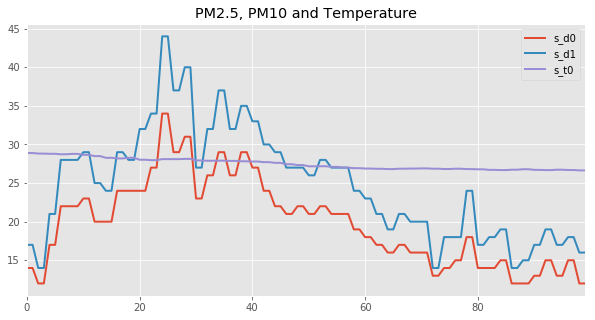

In [14]:
FT1_001_data[['s_d0', 's_d1', 's_t0']][:100].plot(title='PM2.5, PM10 and Temperature')

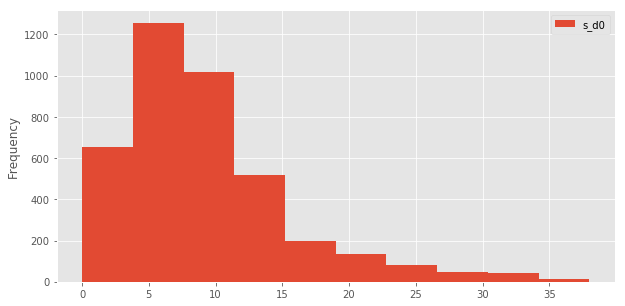

In [15]:
FT1_001_data[['s_d0']].plot(kind='hist', bins=10)

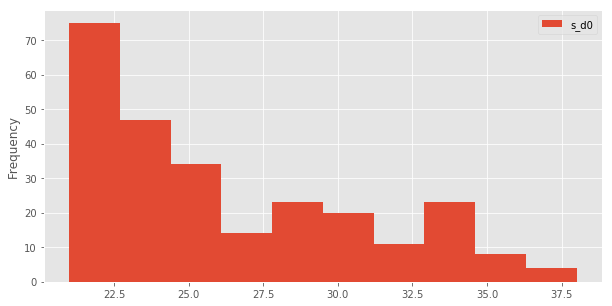

In [16]:
FT1_001_data[FT1_001_data.s_d0 > 20][['s_d0']].plot(kind='hist')

- <h3> Average PM2.5 value of each sensor </h3>

In [17]:
pm25_data.groupby('device_id')['s_d0'].mean()
#將所有device_id相同的gourp起來算mean

device_id
FT1_001    10.325290
FT1_028    11.104498
FT1_031    18.850242
FT1_035    18.161301
FT1_037    11.572604
FT1_041     8.534810
FT1_053    15.108875
FT1_063     9.335905
Name: s_d0, dtype: float64

In [18]:
pm25_data.groupby('device_id')['s_d0'].count()
#將所有device_id相同的gourp起來算count

device_id
FT1_001    1119
FT1_028    1445
FT1_031     414
FT1_035    5778
FT1_037    3402
FT1_041    2844
FT1_053    1093
FT1_063    2852
Name: s_d0, dtype: int64

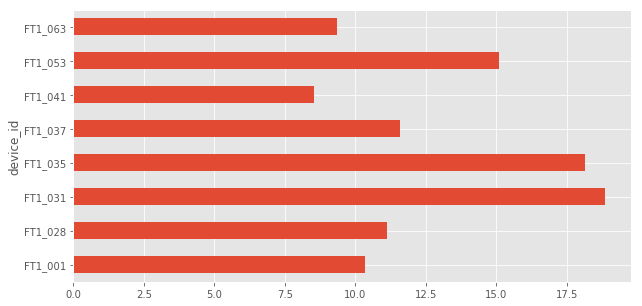

In [19]:
pm25_data.groupby('device_id')['s_d0'].mean().plot(kind='barh')

***
***
# Y5Bus
<img src="img/unnamed.png" alt="Y5Bus" style="width:300px;">

- <h3> Appdl </h3>

In [20]:
appdl_data = pd.read_csv('data/Y5Bus/sample_appdl.csv', na_values=["NaN"])
appdl_data[(appdl_data.Date == '2016-07-01')]
#作業系統下載次數

,Date,OS,value
182,2016-07-01,Android,526
426,2016-07-01,iOS,326


> Filter the July data and get the pivot table of it

In [21]:
Jul_appdl_data = appdl_data[(appdl_data.Date>='2016-07-01') & (appdl_data.Date<='2016-07-31')]
pivot_table = Jul_appdl_data.pivot_table('value',\
                                         index='Date',\
                                         columns='OS',\
                                         aggfunc=sum)
#每一天每個作業系統的總下載次數
pivot_table

OS,Android,iOS
Date,,
2016-07-01,526,326
2016-07-02,419,266
2016-07-03,514,305
2016-07-04,378,226
2016-07-05,330,187
2016-07-06,414,171
2016-07-07,204,181
2016-07-08,372,148
2016-07-09,376,256


> Plot the result

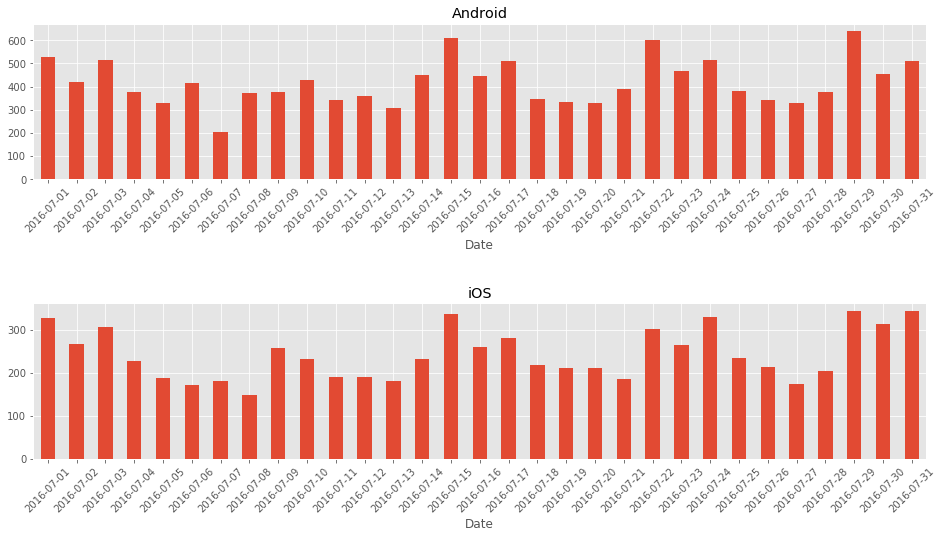

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(16,8))
fig.subplots_adjust(hspace=.8)

pivot_table['Android'].plot(kind='bar', rot=45, ax=axes[0], title='Android')
pivot_table['iOS'].plot(kind='bar', rot=45, ax=axes[1], title='iOS')

> Plot them in the same figure

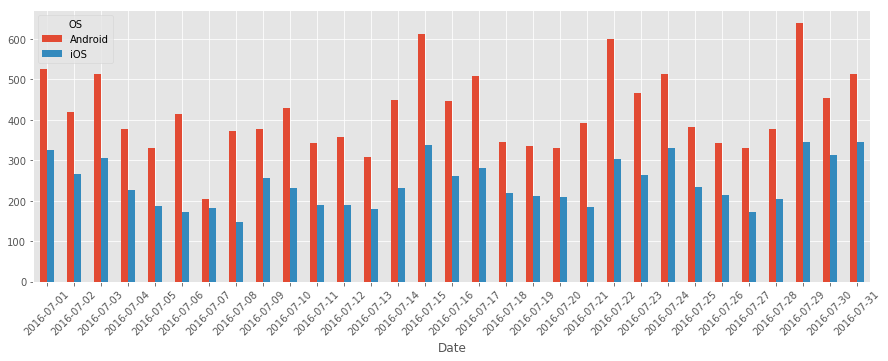

In [23]:
pivot_table.plot(kind='bar', rot=45, figsize=(15, 5))

- <h3> Gps </h3>

In [24]:
gps_data = pd.read_csv('data/Y5Bus/sample_gps_small.csv')
gps_data.head()

,ID,MacAddress,Longitude,Latitude,RSSI1,MNC1,IMSI1,CELLID1,RSSI2,MNC2,IMSI2,CELLID2,CreateTime,IsCheckPoint,IsUsed,Speed
0,59512535,001970C14035,120.618527,24.143759,-63,92,4.669243e+14,106603553,-150.0,0.0,NaN,21690747.0,2016-08-01 00:00:00,0,0,NaN
1,59512536,001970C11733,121.447935,25.071413,-61,92,4.669243e+14,28570135,NaN,NaN,NaN,NaN,2016-08-01 00:00:01,0,0,94.0
2,59512537,001970C11D25,0.000000,0.000000,-75,1,4.660115e+14,181827085,NaN,NaN,NaN,NaN,2016-08-01 00:00:01,0,0,0.0
3,59512538,001970C1170F,120.919453,24.693612,-45,92,4.669243e+14,106006541,NaN,NaN,NaN,NaN,2016-08-01 00:00:01,0,0,96.0
4,59512539,001970A2F198,120.493055,23.889108,-44,92,4.669241e+14,131811607,NaN,NaN,NaN,NaN,2016-08-01 00:00:01,0,0,96.0


In [25]:
gps_data[gps_data.MacAddress=="001970C14035"].count()

ID              34
MacAddress      34
Longitude       34
Latitude        34
RSSI1           34
MNC1            34
IMSI1           34
CELLID1         34
RSSI2           34
MNC2            34
IMSI2            0
CELLID2         34
CreateTime      34
IsCheckPoint    34
IsUsed          34
Speed            0
dtype: int64

- <h3> 請基於以上兩種資料集，利用 Pandas 等套件，做三種資料觀察和呈現，並敘述你的目的，以及對結果的理解或發現
</h3>
- More Visualization: https://pandas.pydata.org/pandas-docs/stable/visualization.html

In [26]:
pm25_data['datatime'].unique()

array(['2016-09-10 06:29:18', '2016-09-10 06:30:18', '2016-09-10 06:31:17',
       ..., '2016-09-11 06:26:00', '2016-09-11 06:26:59',
       '2016-09-11 06:28:00'], dtype=object)

In [27]:
pm25_data[['datatime', 's_d0', 's_d1', 's_t0', 's_h0']]

,datatime,s_d0,s_d1,s_t0,s_h0
0,2016-09-10 06:29:18,14.0,17.0,28.89,83.12
1,2016-09-10 06:29:18,14.0,17.0,28.89,83.12
2,2016-09-10 06:30:18,12.0,14.0,28.82,83.73
3,2016-09-10 06:30:18,12.0,14.0,28.82,83.73
4,2016-09-10 06:31:17,17.0,21.0,28.79,84.23
5,2016-09-10 06:31:17,17.0,21.0,28.79,84.23
6,2016-09-10 06:32:17,22.0,28.0,28.73,84.68
7,2016-09-10 06:32:17,22.0,28.0,28.73,84.68
8,2016-09-10 06:33:18,22.0,28.0,28.78,86.07
9,2016-09-10 06:33:18,22.0,28.0,28.78,86.07


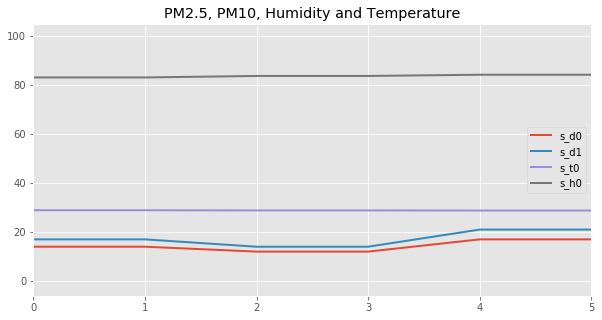

In [28]:
pm25_data[['s_d0', 's_d1', 's_t0', 's_h0']].plot(title = 'PM2.5, PM10, Humidity and Temperature', xlim = (0, 5))

In [29]:
pm25_data.groupby('datatime')[['s_d0', 's_d1', 's_t0', 's_h0']].mean()

,s_d0,s_d1,s_t0,s_h0
datatime,,,,
2016-09-10 06:24:01,16.0,28.0,31.10,98.30
2016-09-10 06:24:31,17.0,26.0,31.20,98.30
2016-09-10 06:25:00,17.0,27.0,31.10,98.30
2016-09-10 06:25:30,16.0,28.0,31.10,98.30
2016-09-10 06:26:00,16.0,30.0,31.10,98.40
2016-09-10 06:26:30,17.0,26.0,31.10,98.40
2016-09-10 06:27:00,15.0,31.0,31.10,98.40
2016-09-10 06:27:30,20.0,27.0,31.20,97.90
2016-09-10 06:28:00,20.0,28.0,31.20,98.30


In [105]:
pm25_data[(pm25_data.datatime == '2016-09-10 22:17:48')]

,device_id,datatime,app,gps_x,gps_y,gps_z,gps_lon,gps_lat,gps_alt,ver_format,...,tick,s_1,s_0,s_3,s_2,s_4,s_t0,s_d0,s_d1,s_h0
13006,FT1_037,2016-09-10 22:17:48,PM25,0.0,0.0,0.0,121.553135,25.05498,56.0,3,...,13667228,100.0,457.0,0.0,1.0,2.0,29.3,79.0,81.0,88.5
13007,FT1_037,2016-09-10 22:17:48,PM25,0.0,0.0,0.0,121.553135,25.05498,56.0,3,...,13667228,100.0,457.0,0.0,1.0,2.0,29.3,79.0,81.0,88.5


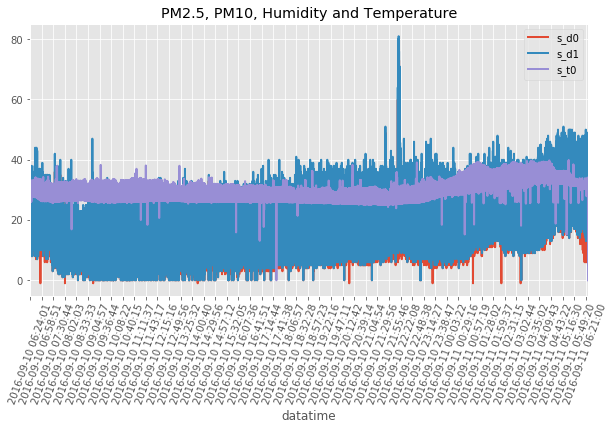

In [98]:
pm25_datatime_data = pm25_data.groupby('datatime')[['s_d0', 's_d1', 's_t0']].mean()
size = len(pm25_datatime_data)
pm25_datatime_data.plot(title = 'PM2.5, PM10, Humidity and Temperature', rot = 70, xticks = range(0, size, int(size/48)))

In [115]:
len(pm25_data.groupby('datatime')[['s_d0', 's_d1', 's_t0']].mean())

10846

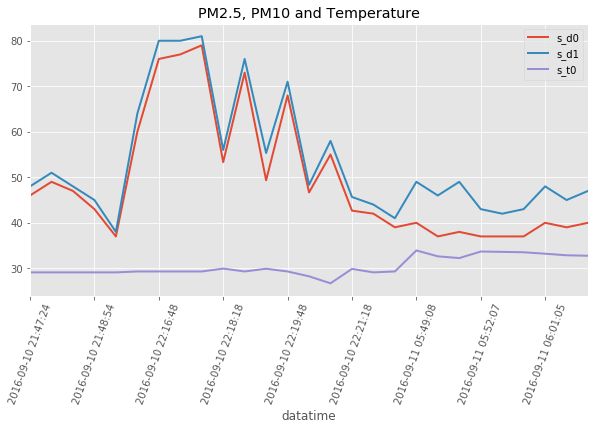

In [117]:
pm25_datatime_data = pm25_data.groupby('datatime')[['s_d0', 's_d1', 's_t0']].mean()
pm25_datatime_thresh_sd0 = pm25_datatime_data[pm25_datatime_data.s_d0 > 36]
size = len(pm25_datatime_thresh_sd0)
pm25_datatime_thresh_sd0.plot(title = 'PM2.5, PM10 and Temperature', rot = 70, xticks = range(0, size, int(size/8)))

In [112]:
pm25_datatime_thresh_sd0

,s_d0,s_d1,s_t0,s_h0
datatime,,,,
2016-09-10 21:47:24,46.000000,48.000000,29.100000,89.200000
2016-09-10 21:47:54,49.000000,51.000000,29.100000,89.200000
2016-09-10 21:48:24,47.000000,48.000000,29.100000,89.200000
2016-09-10 21:48:54,43.000000,45.000000,29.100000,89.200000
2016-09-10 21:49:23,37.000000,38.000000,29.100000,89.200000
2016-09-10 22:15:49,60.000000,64.000000,29.300000,88.700000
2016-09-10 22:16:48,76.000000,80.000000,29.300000,88.500000
2016-09-10 22:17:18,77.000000,80.000000,29.300000,88.500000
2016-09-10 22:17:48,79.000000,81.000000,29.300000,88.500000


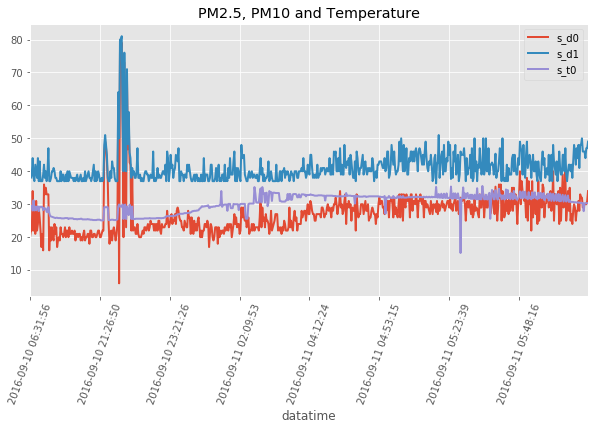

In [118]:
pm25_datatime_data = pm25_data.groupby('datatime')[['s_d0', 's_d1', 's_t0']].mean()
pm25_datatime_thresh_sd1 = pm25_datatime_data[pm25_datatime_data.s_d1 > 36]
size = len(pm25_datatime_thresh_sd1)
pm25_datatime_thresh_sd1.plot(title = 'PM2.5, PM10 and Temperature', rot = 70, xticks = range(0, size, int(size/8)))

In [110]:
pm25_datatime_thresh_sd1

,s_d0,s_d1,s_t0
datatime,,,
2016-09-10 06:31:56,20.0,38.0,29.60
2016-09-10 06:39:55,22.0,38.0,29.50
2016-09-10 06:40:55,22.0,39.0,29.50
2016-09-10 06:41:15,34.0,44.0,28.10
2016-09-10 06:41:54,22.0,38.0,31.20
2016-09-10 06:42:15,29.0,37.0,28.10
2016-09-10 06:42:54,21.0,42.0,29.30
2016-09-10 06:43:15,31.0,40.0,28.13
2016-09-10 06:43:54,22.0,38.0,29.30
